### Import required packages

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, accuracy_score
from scipy.stats import skew

#### Load the Dataset

In [56]:
df = pd.read_csv("res/forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### a. Identify missing values and fill it with mean

In [25]:
print('----------------Missing Values----------------')
print(df.isna().sum())
print('----------------------------------------------')
print('Filling missing values with their respective means')
df.select_dtypes(include=[np.number]).fillna(df.select_dtypes(include=[np.number]).mean())

----------------Missing Values----------------
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
----------------------------------------------
Filling missing values with their respective means


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### b. Skewness and Kurtosis

In [34]:
for col in df.select_dtypes(include=[np.number]).columns:
    print(f'Skewness of df[{col:^8}] is {skew(df[col]):.2f}')

Skewness of df[   X    ] is 0.04
Skewness of df[   Y    ] is 0.42
Skewness of df[  FFMC  ] is -6.56
Skewness of df[  DMC   ] is 0.55
Skewness of df[   DC   ] is -1.10
Skewness of df[  ISI   ] is 2.53
Skewness of df[  temp  ] is -0.33
Skewness of df[   RH   ] is 0.86
Skewness of df[  wind  ] is 0.57
Skewness of df[  rain  ] is 19.76
Skewness of df[  area  ] is 12.81


#### c. Outliers and Visualize

<AxesSubplot:xlabel='area'>

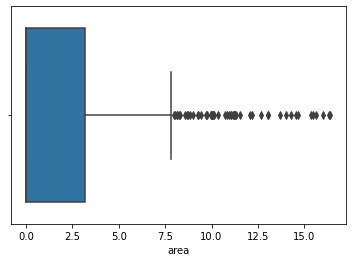

In [50]:
q3 = np.percentile(df['area'], 75, interpolation='midpoint')
q1 = np.percentile(df['area'], 25, interpolation='midpoint')
iqr = q3 - q1
upper = np.where(df['area'] >= (q3 + (1.5 * iqr)))
lower = np.where(df['area'] <= (q1 - (1.5 * iqr)))
sns.boxplot(x=df['area'])

#### d. Categorical and Numerical Data

In [21]:
numerical = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(exclude=[np.number])

print(numerical)
print('---------')
print(categorical)

     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 11 columns]
---------
    month  day
0     mar  fri
1     oct  tue
2     oct  sat
3     mar  fri
4     mar  sun
..    ...  ...
512   aug  sun
513   aug  sun
514   aug  sun
515   aug  sat
516   nov  tue

[517

#### e. Prepare the data for Modelling

In [66]:
le = LabelEncoder()
for col in df.select_dtypes(exclude=[np.number]).columns:
    df[col] = le.fit_transform(df[col])
mms = MinMaxScaler()
scaled = mms.fit_transform(df)
encD = pd.DataFrame(scaled, columns=df.columns)
cols = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']
X = encD[cols]
y = encD['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40) 

#### f. Regression

In [72]:
linreg = LinearRegression()
logreg = LogisticRegression()

#### g. Train the models

In [75]:
linreg = linreg.fit(X_train, y_train)
logreg = linreg.fit(X_train, y_train)

#### h. Predict the burned area 

In [78]:
lin_y_pred = linreg.predict(X_test)
log_y_pred = logreg.predict(X_test)

#### i. Analyze the Performance and Visualize them

In [93]:
print(f'Accuracy of Linear Regression based classifier: {linreg.score(X_test, lin_y_pred)}')
print(f'Accuracy of Logistic Regression based classifier: {logreg.score(X_test, lin_y_pred)}')

Accuracy of Linear Regression based classifier: 1.0
Accuracy of Logistic Regression based classifier: 1.0


In [96]:
print(f'MAE of Linear Regression Model: {mean_absolute_error(y_test, lin_y_pred)}')
print(f'MAE of Logistic Regression Model: {mean_absolute_error(y_test, log_y_pred)}')

MAE of Linear Regression Model: 0.01878496574770983
MAE of Logistic Regression Model: 0.01878496574770983


In [97]:
print(f'MSE of Linear Regression Model: {mean_squared_error(y_test, lin_y_pred)}')
print(f'MSE of Logistic Regression Model: {mean_squared_error(y_test, log_y_pred)}')

MSE of Linear Regression Model: 0.003920561060256019
MSE of Logistic Regression Model: 0.003920561060256019
